In [1]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_excel('marilao_river_raw.xlsx')
data

date  DO_1  DO_2  DO_3  DO_4  DO_5  BOD_1  BOD_2  BOD_3  BOD_4  ...  \
0  2022-01-01  0.35  0.28  0.58  1.23  1.51     48     34     99     55  ...   
1  2022-02-01  1.83  1.81  1.79  0.85  0.79     30     44    115     78  ...   
2  2022-03-01  1.83  1.81  1.79  0.85  0.79     30     47    121     60  ...   
3  2022-04-01  3.01  2.17  1.15  0.81  0.85     28     55     50     25  ...   
4  2022-05-01  3.18  3.05  2.05  1.78  2.22     25     23     97     61  ...   
5  2022-06-01  0.81  0.75  0.98  2.01  0.05     11      9     14     34  ...   
6  2022-07-01  3.18  2.52  1.48  1.58  1.64     25     39     26     25  ...   
7  2022-08-01  2.15  1.95  0.75  0.89  0.95     10     14     21     21  ...   
8  2022-09-01  3.11  3.08  1.12  1.19  1.10     11      2      3      4  ...   
9  2022-10-01  6.90  5.00  0.20  0.10  0.10     14     12     20     20  ...   
10 2022-11-01  0.10  0.20  0.30  4.50  3.80     13     18     53     63  ...   
11 2022-12-01  0.10  0.10  0.10  0.70  0.80     82     90     83     89  ...   
12 2023-01-01  0.90  0.50  0.10  4.20  3.70     22     26     26     10  ...   
13 2023-02-01  0.10  0.10  0.10  0.10  0.10     75     55     26     82  ...   
14 2023-03-01  0.10  0.10  0.70  0.10  4.50    111    104     96    113  ...   
15 2023-04-01  0.80  1.50  1.40  5.30  5.00     22     23     23     11  ...   
16 2023-05-01  0.10  0.10  0.10  2.00  1.40     38     38     41     39  ...   
17 2023-06-01  0.10  0.10  0.10  0.30  0.30     45     43     33     69  ...   
18 2023-07-01  1.00  0.40  1.80  1.00  4.00     39     35     43     41  ...   
19 2023-08-01  3.00  2.70  2.60  5.70  5.70      9     11     11      7  ...   
20 2023-09-01  4.90  5.40  5.00  6.50  5.80      8      7      7     10  ...   
21 2023-10-01  2.00  1.50  4.20  5.50  5.50     15     15     10      8  ...   
22 2023-11-01  0.10  0.10  0.10  4.60  3.70     38     33     31     12  ...   
23 2023-12-01  0.10  0.10  0.10  2.30  1.80     42     33     40     14  ...   
24 2024-01-01  0.10  0.10  0.10  1.00  1.30     64     58     65     58  ...   
25 2024-02-01  0.10  0.10  0.10  4.00  3.40     49     40     46     26  ...   
26 2024-03-01  0.10  0.10  0.10  2.30  3.90     46     33     33     35  ...   
27 2024-04-01  0.10  0.10  0.10  3.50  5.50     45     47     41     35  ...   
28 2024-05-01  0.10  0.10  0.10  0.10  2.10     57     78     92     47  ...   
29 2024-06-01  0.40  1.30  0.40  4.10  4.30     11     17     12     11  ...   
30 2024-07-01  0.60  1.50  0.20  0.70  5.10     27     17     12     49  ...   
31 2024-08-01  1.20  2.00  2.00  6.50  5.80      6      6      5      5  ...   
32 2024-09-01  6.40  6.40  6.00  7.30  7.10      3      3      2      3  ...   

    PO4-P_1  PO4-P_2  PO4-P_3  PO4-P_4  PO4-P_5  Cl_1  Cl_2  Cl_3  Cl_4  Cl_5  
0     1.368    2.063    2.307    2.138    2.190    40    40    54   620   753  
1     2.345    3.301    3.342    3.175    3.002    41    64    91   774  1346  
2     2.374    2.308    2.371    2.444    2.227    41    43   619   666   714  
3     1.369    1.075    0.990    1.045    0.937    39    44    44    54   103  
4     1.298    1.306    1.208    1.214    1.118    46    58    63    97   102  
5     0.581    0.571    0.713    0.709    0.709    24    24    24    53    43  
6     1.225    0.790    0.838    0.836    0.716   404   476   293   284   481  
7     1.148    1.155    1.399    1.331    1.318   115   120   115   106   120  
8     0.629    0.735    0.649    0.610    0.602    97    68    61    63    58  
9     1.917    1.885    1.986    1.781    1.235   385   203    58    37    32  
10    1.254    1.426    1.759    1.694    1.763    32    34    67    49    52  
11    1.748    1.900    1.927    1.896    1.948    41    41   896   943   943  
12    1.396    0.505    0.286    0.026    0.920    22    25    20    11    11  
13    2.584    2.321    2.398    1.636    1.877   990  1462  1603    69    43  
14    2.282    2.445    2.440    1.676    1.525  1333   809   857    43    42  
15    0.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33 non-null     datetime64[ns]
 1   DO_1       33 non-null     float64       
 2   DO_2       33 non-null     float64       
 3   DO_3       33 non-null     float64       
 4   DO_4       33 non-null     float64       
 5   DO_5       33 non-null     float64       
 6   BOD_1      33 non-null     int64         
 7   BOD_2      33 non-null     int64         
 8   BOD_3      33 non-null     int64         
 9   BOD_4      33 non-null     int64         
 10  BOD_5      33 non-null     int64         
 11  TSS_1      33 non-null     int64         
 12  TSS_2      33 non-null     int64         
 13  TSS_3      33 non-null     int64         
 14  TSS_4      33 non-null     int64         
 15  TSS_5      33 non-null     int64         
 16  pH_1       33 non-null     float64       
 17 

In [5]:
data.describe()

date       DO_1       DO_2       DO_3  \
count                             33  33.000000  33.000000  33.000000   
mean   2023-05-02 01:27:16.363636480   1.480303   1.424848   1.142121   
min              2022-01-01 00:00:00   0.100000   0.100000   0.100000   
25%              2022-09-01 00:00:00   0.100000   0.100000   0.100000   
50%              2023-05-01 00:00:00   0.800000   0.750000   0.580000   
75%              2024-01-01 00:00:00   2.150000   2.000000   1.790000   
max              2024-09-01 00:00:00   6.900000   6.400000   6.000000   
std                              NaN   1.844443   1.670212   1.476173   

            DO_4       DO_5       BOD_1       BOD_2       BOD_3       BOD_4  \
count  33.000000  33.000000   33.000000   33.000000   33.000000   33.000000   
mean    2.533030   2.866667   33.303030   33.606061   42.333333   36.969697   
min     0.100000   0.050000    3.000000    2.000000    2.000000    3.000000   
25%     0.850000   0.950000   13.000000   15.000000   14.000000   11.000000   
50%     1.780000   2.220000   28.000000   33.000000   33.000000   34.000000   
75%     4.200000   4.500000   45.000000   44.000000   53.000000   58.000000   
max     7.300000   7.100000  111.000000  104.000000  121.000000  113.000000   
std     2.195244   2.090657   24.515919   24.406633   34.593774   28.485177   

       ...    PO4-P_1    PO4-P_2    PO4-P_3    PO4-P_4    PO4-P_5  \
count  ...  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   ...   1.433879   1.352879   1.438818   1.357576   1.321061   
min    ...   0.322000   0.168000   0.286000   0.026000   0.263000   
25%    ...   0.879000   0.651000   0.741000   0.836000   0.830000   
50%    ...   1.369000   1.299000   1.405000   1.291000   1.268000   
75%    ...   1.917000   1.983000   1.986000   1.798000   1.735000   
max    ...   2.584000   3.301000   3.342000   3.175000   3.002000   
std    ...   0.651485   0.805978   0.769537   0.676338   0.605723   

              Cl_1         Cl_2         Cl_3        Cl_4         Cl_5  
count    33.000000    33.000000    33.000000   33.000000    33.000000  
mean    258.393939   220.545455   231.969697  159.272727   189.878788  
min      10.000000     5.000000     5.000000   10.000000    10.000000  
25%      40.000000    41.000000    44.000000   39.000000    41.000000  
50%      60.000000    64.000000    64.000000   54.000000    54.000000  
75%     385.000000   255.000000   293.000000  113.000000   120.000000  
max    1333.000000  1462.000000  1603.000000  943.000000  1346.000000  
std     341.025012   330.895479   345.606847  239.541655   311.610710  

[8 rows x 51 columns]

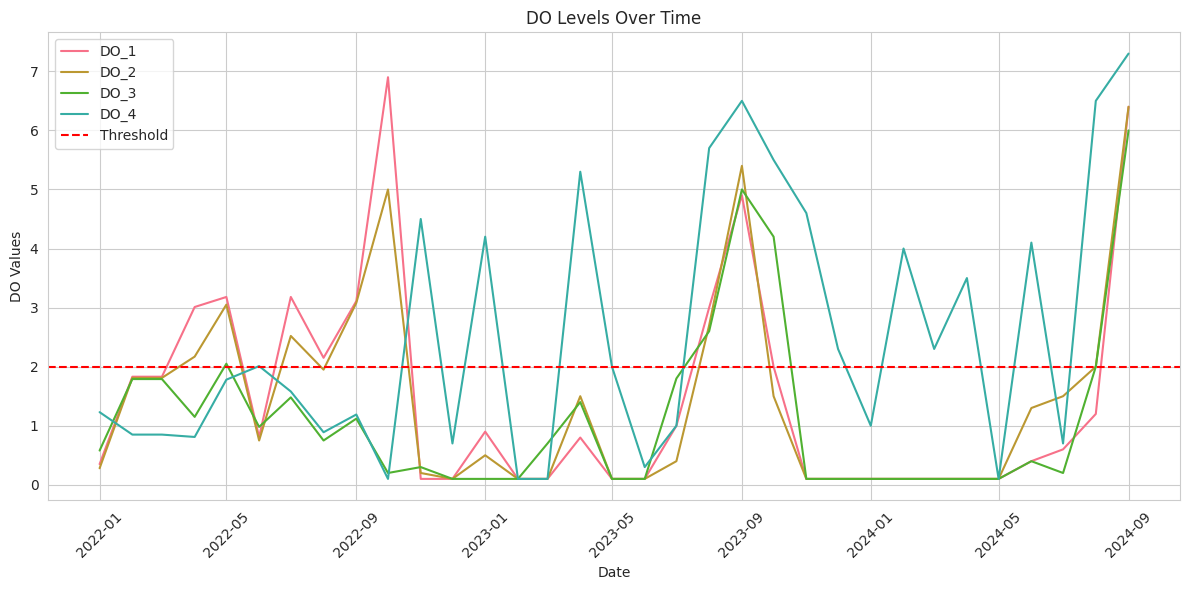

In [6]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='DO_1', data=data, label='DO_1')
sns.lineplot(x='date', y='DO_2', data=data, label='DO_2')
sns.lineplot(x='date', y='DO_3', data=data, label='DO_3')
sns.lineplot(x='date', y='DO_4', data=data, label='DO_4')

# Add threshold line at y=2
plt.axhline(y=2, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('DO Values')
plt.title('DO Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

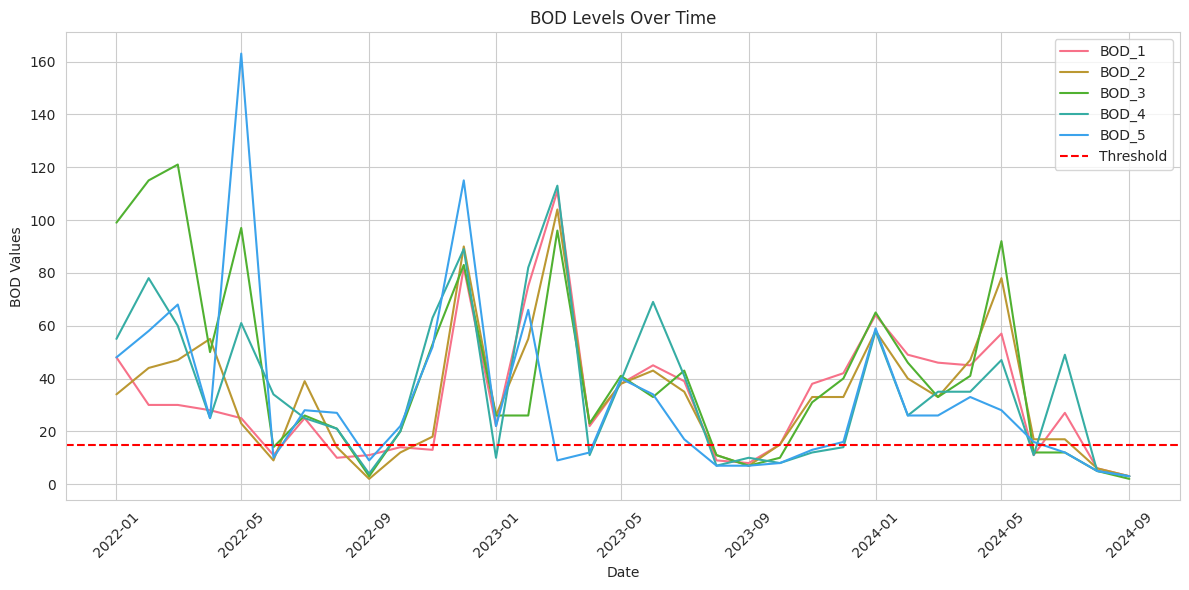

In [7]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='BOD_1', data=data, label='BOD_1')
sns.lineplot(x='date', y='BOD_2', data=data, label='BOD_2')
sns.lineplot(x='date', y='BOD_3', data=data, label='BOD_3')
sns.lineplot(x='date', y='BOD_4', data=data, label='BOD_4')
sns.lineplot(x='date', y='BOD_5', data=data, label='BOD_5')

# Add threshold line at y=15
plt.axhline(y=15, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('BOD Values')
plt.title('BOD Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

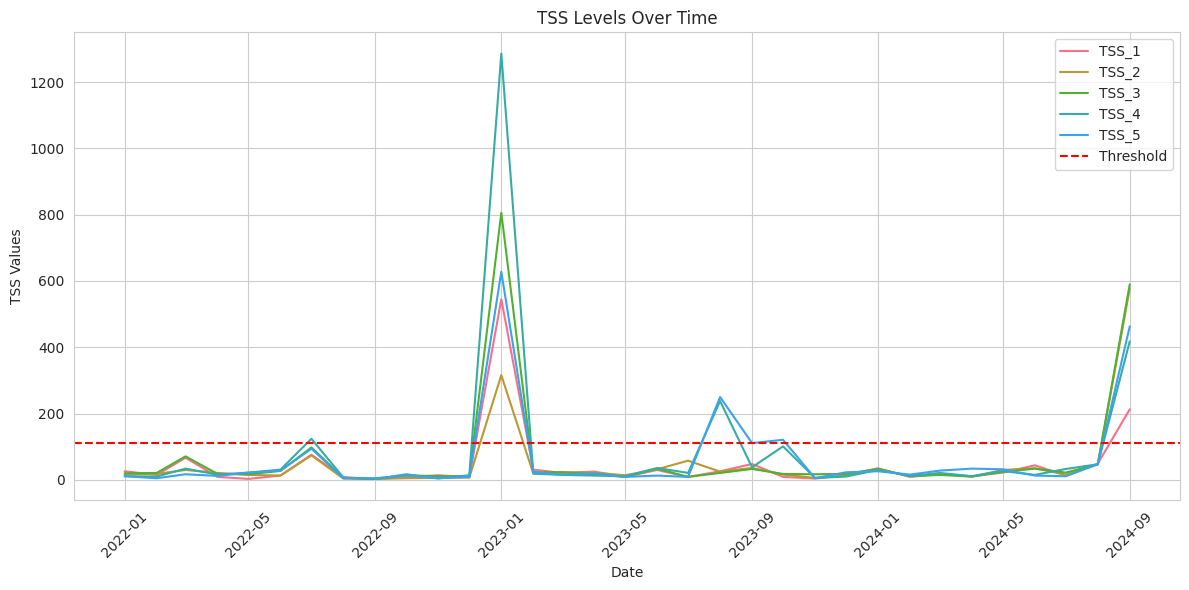

In [8]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='TSS_1', data=data, label='TSS_1')
sns.lineplot(x='date', y='TSS_2', data=data, label='TSS_2')
sns.lineplot(x='date', y='TSS_3', data=data, label='TSS_3')
sns.lineplot(x='date', y='TSS_4', data=data, label='TSS_4')
sns.lineplot(x='date', y='TSS_5', data=data, label='TSS_5')

# Add threshold line at y=110
plt.axhline(y=110, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('TSS Values')
plt.title('TSS Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

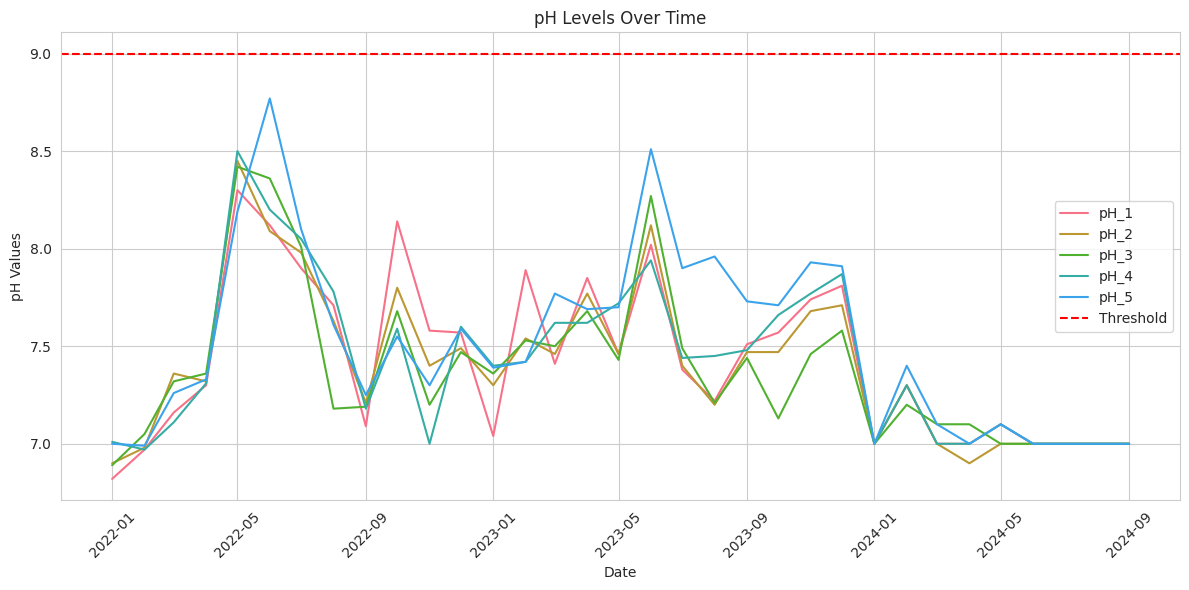

In [9]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='pH_1', data=data, label='pH_1')
sns.lineplot(x='date', y='pH_2', data=data, label='pH_2')
sns.lineplot(x='date', y='pH_3', data=data, label='pH_3')
sns.lineplot(x='date', y='pH_4', data=data, label='pH_4')
sns.lineplot(x='date', y='pH_5', data=data, label='pH_5')

# Add threshold line at y=9
plt.axhline(y=9, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('pH Values')
plt.title('pH Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

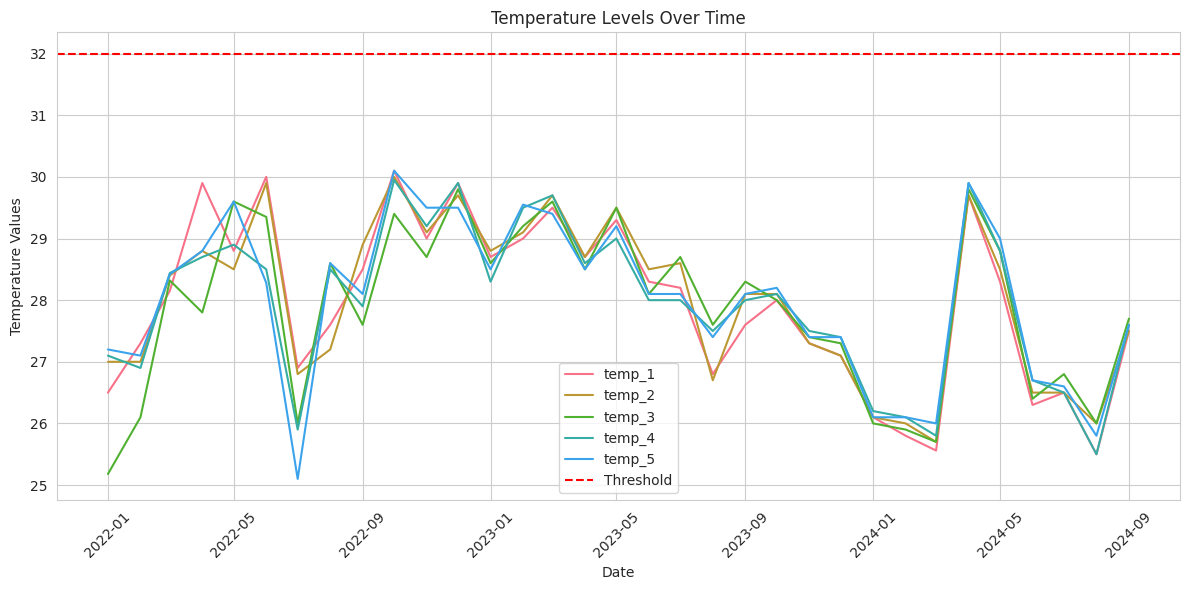

In [10]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='temp_1', data=data, label='temp_1')
sns.lineplot(x='date', y='temp_2', data=data, label='temp_2')
sns.lineplot(x='date', y='temp_3', data=data, label='temp_3')
sns.lineplot(x='date', y='temp_4', data=data, label='temp_4')
sns.lineplot(x='date', y='temp_5', data=data, label='temp_5')

# Add threshold line at y=32
plt.axhline(y=32, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Temperature Values')
plt.title('Temperature Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

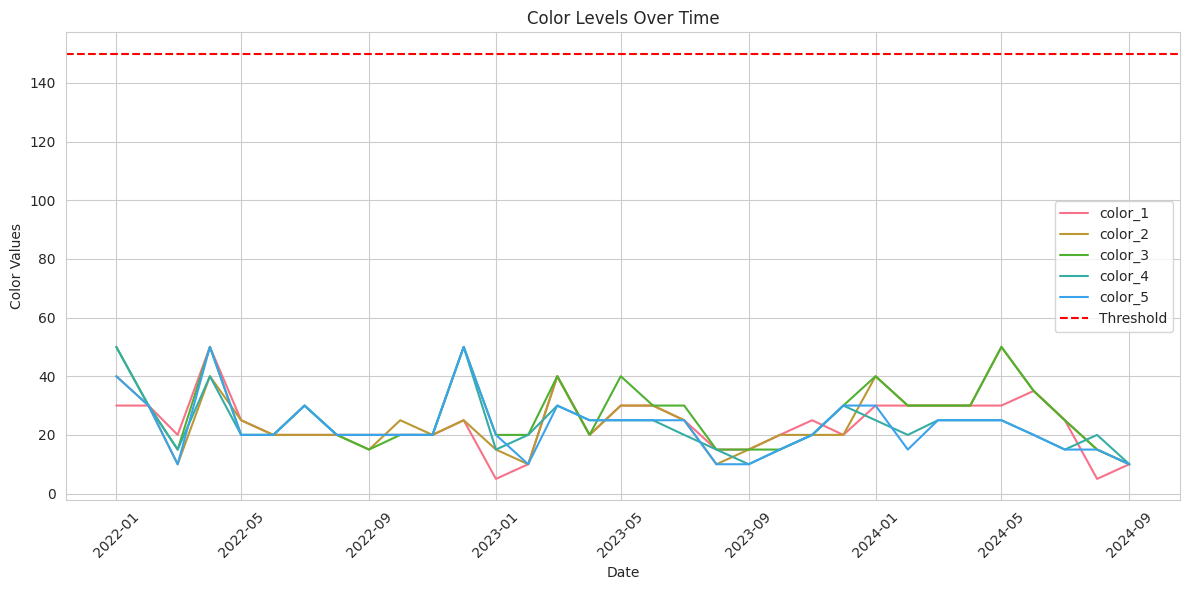

In [11]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='color_1', data=data, label='color_1')
sns.lineplot(x='date', y='color_2', data=data, label='color_2')
sns.lineplot(x='date', y='color_3', data=data, label='color_3')
sns.lineplot(x='date', y='color_4', data=data, label='color_4')
sns.lineplot(x='date', y='color_5', data=data, label='color_5')

# Add threshold line at y=150
plt.axhline(y=150, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Color Values')
plt.title('Color Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

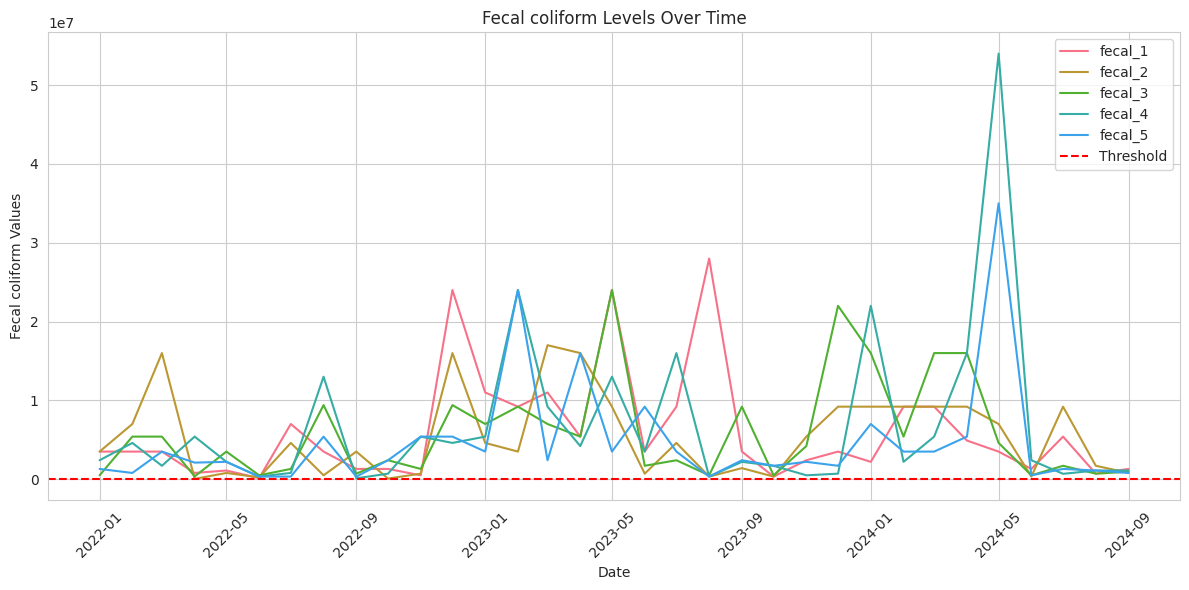

In [12]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='fecal_1', data=data, label='fecal_1')
sns.lineplot(x='date', y='fecal_2', data=data, label='fecal_2')
sns.lineplot(x='date', y='fecal_3', data=data, label='fecal_3')
sns.lineplot(x='date', y='fecal_4', data=data, label='fecal_4')
sns.lineplot(x='date', y='fecal_5', data=data, label='fecal_5')

# Add threshold line at y=400
plt.axhline(y=400, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Fecal coliform Values')
plt.title('Fecal coliform Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

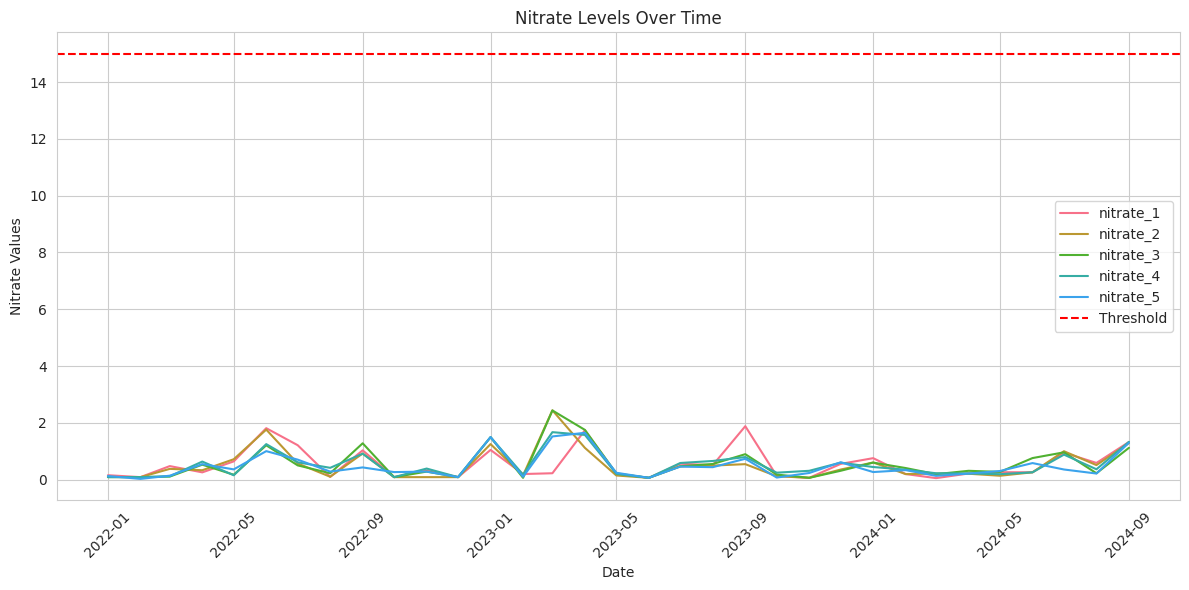

In [13]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='nitrate_1', data=data, label='nitrate_1')
sns.lineplot(x='date', y='nitrate_2', data=data, label='nitrate_2')
sns.lineplot(x='date', y='nitrate_3', data=data, label='nitrate_3')
sns.lineplot(x='date', y='nitrate_4', data=data, label='nitrate_4')
sns.lineplot(x='date', y='nitrate_5', data=data, label='nitrate_5')

# Add threshold line at y=15
plt.axhline(y=15, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Nitrate Values')
plt.title('Nitrate Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

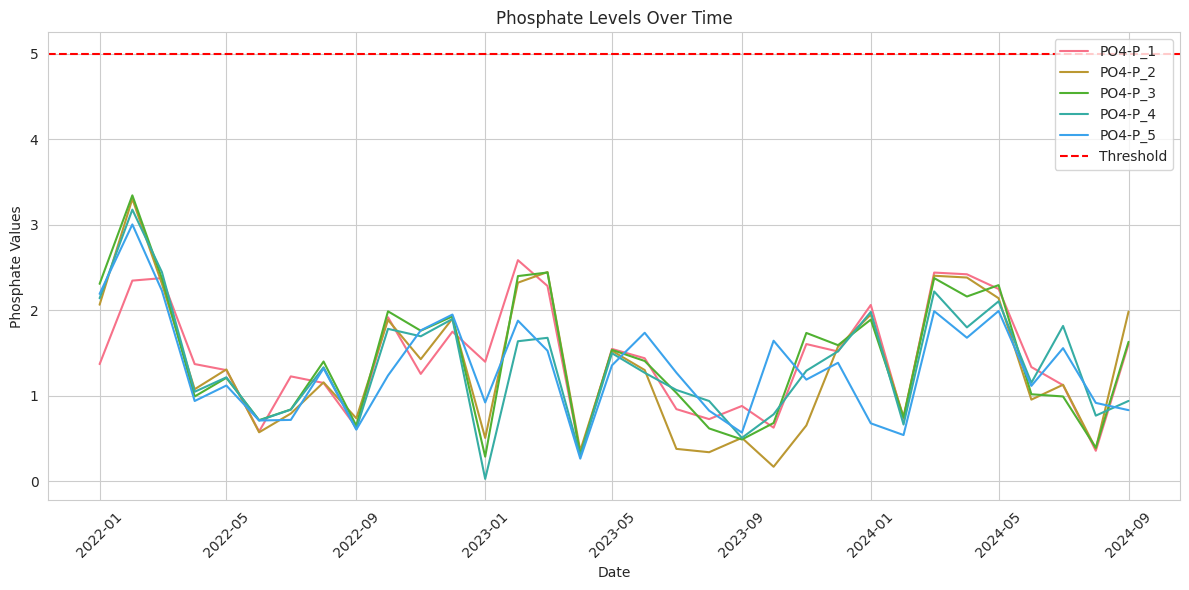

In [14]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='PO4-P_1', data=data, label='PO4-P_1')
sns.lineplot(x='date', y='PO4-P_2', data=data, label='PO4-P_2')
sns.lineplot(x='date', y='PO4-P_3', data=data, label='PO4-P_3')
sns.lineplot(x='date', y='PO4-P_4', data=data, label='PO4-P_4')
sns.lineplot(x='date', y='PO4-P_5', data=data, label='PO4-P_5')

# Add threshold line at y=5
plt.axhline(y=5, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Phosphate Values')
plt.title('Phosphate Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

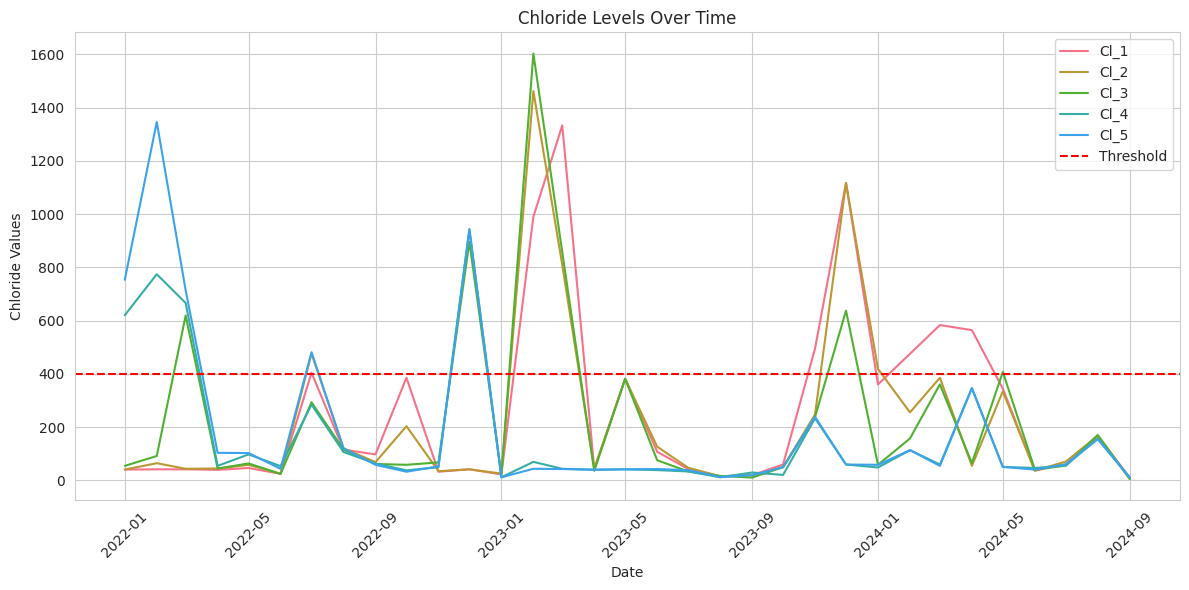

In [15]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='Cl_1', data=data, label='Cl_1')
sns.lineplot(x='date', y='Cl_2', data=data, label='Cl_2')
sns.lineplot(x='date', y='Cl_3', data=data, label='Cl_3')
sns.lineplot(x='date', y='Cl_4', data=data, label='Cl_4')
sns.lineplot(x='date', y='Cl_5', data=data, label='Cl_5')

# Add threshold line at y=400
plt.axhline(y=400, color='r', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Chloride Values')
plt.title('Chloride Levels Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

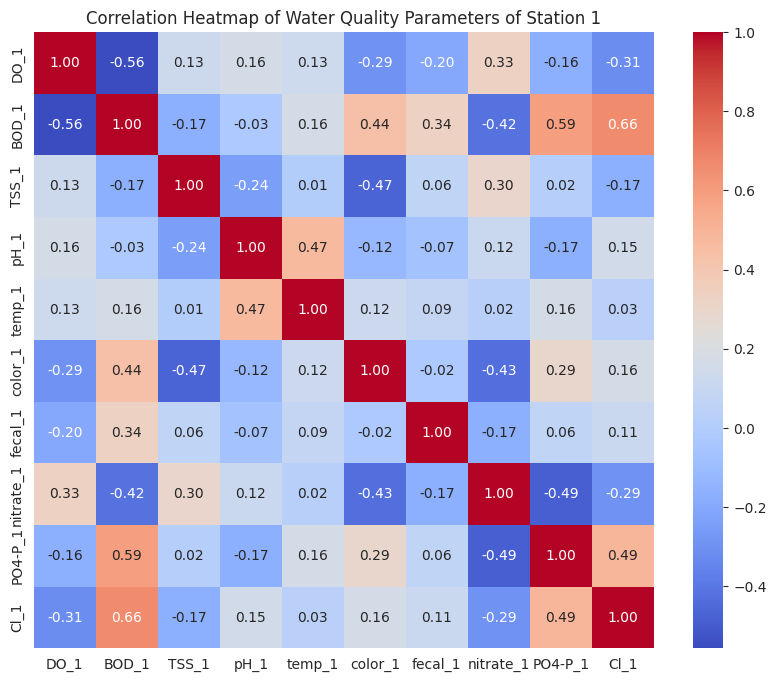

In [16]:
# Select the specified columns for the correlation heatmap
columns_for_heatmap = ['DO_1', 'BOD_1', 'TSS_1', 'pH_1', 'temp_1', 'color_1', 'fecal_1', 'nitrate_1', 'PO4-P_1', 'Cl_1']
correlation_matrix = data[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters of Station 1')
plt.show()

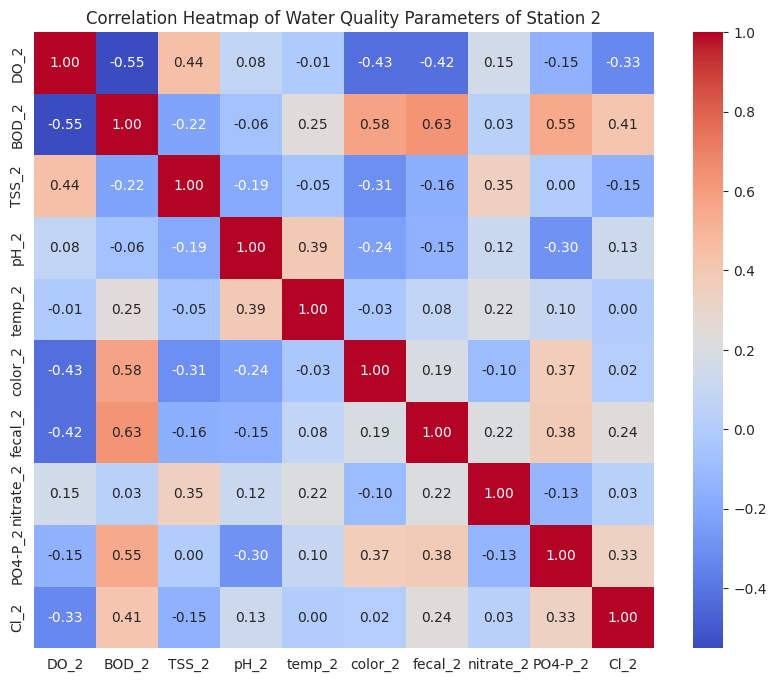

In [17]:
# Select the specified columns for the correlation heatmap
columns_for_heatmap = ['DO_2', 'BOD_2', 'TSS_2', 'pH_2', 'temp_2', 'color_2', 'fecal_2', 'nitrate_2', 'PO4-P_2', 'Cl_2']
correlation_matrix = data[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters of Station 2')
plt.show()

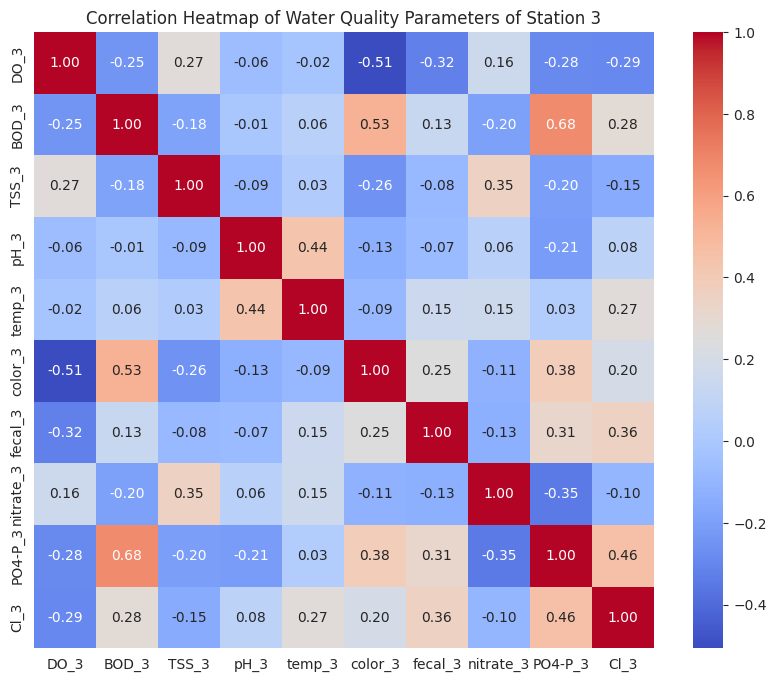

In [18]:
# Select the specified columns for the correlation heatmap
columns_for_heatmap = ['DO_3', 'BOD_3', 'TSS_3', 'pH_3', 'temp_3', 'color_3', 'fecal_3', 'nitrate_3', 'PO4-P_3', 'Cl_3']
correlation_matrix = data[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters of Station 3')
plt.show()

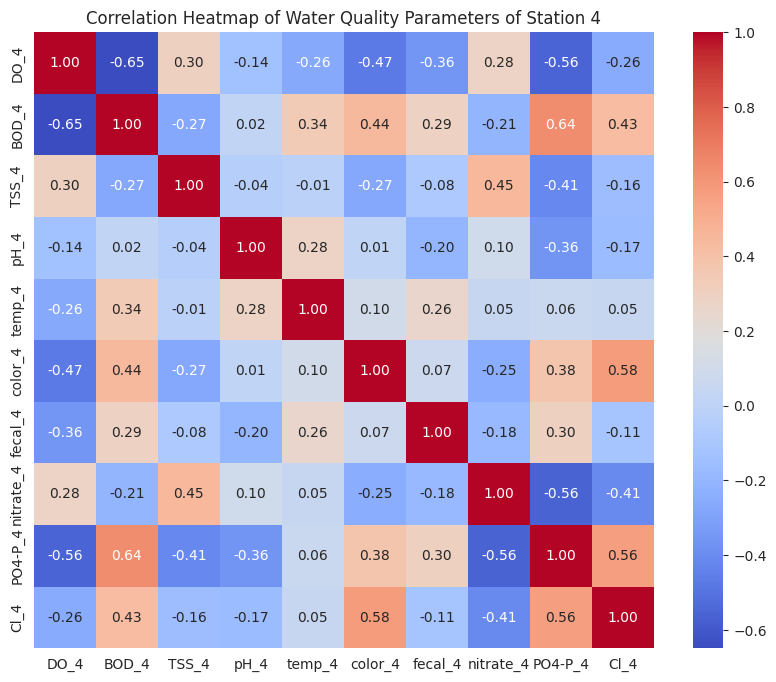

In [19]:
# Select the specified columns for the correlation heatmap
columns_for_heatmap = ['DO_4', 'BOD_4', 'TSS_4', 'pH_4', 'temp_4', 'color_4', 'fecal_4', 'nitrate_4', 'PO4-P_4', 'Cl_4']
correlation_matrix = data[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters of Station 4')
plt.show()

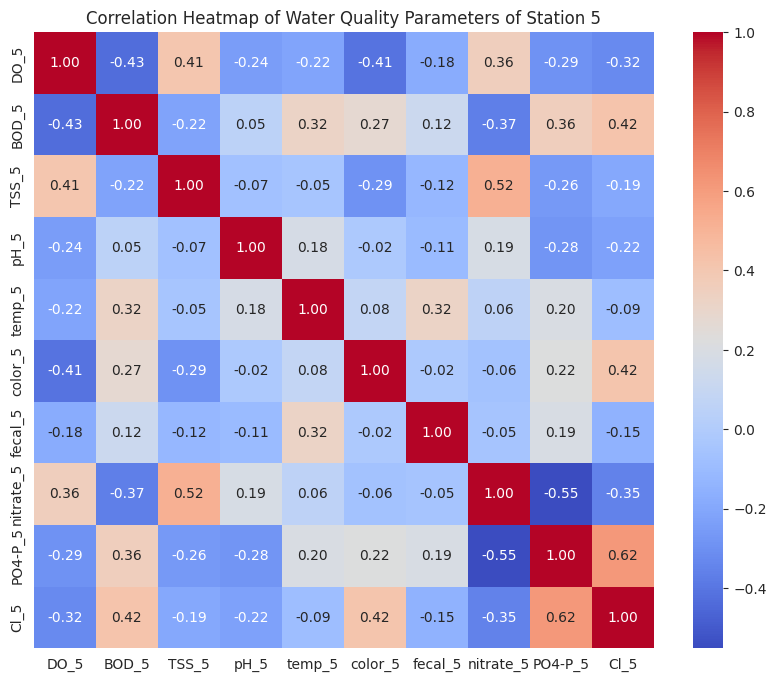

In [20]:
# Select the specified columns for the correlation heatmap
columns_for_heatmap = ['DO_5', 'BOD_5', 'TSS_5', 'pH_5', 'temp_5', 'color_5', 'fecal_5', 'nitrate_5', 'PO4-P_5', 'Cl_5']
correlation_matrix = data[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters of Station 5')
plt.show()

In [21]:
X = data.drop(['date','color_3'], axis=1)

In [22]:
y = data['color_3']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(26, 49)

In [25]:
X_test.shape

(7, 49)

In [26]:
scaler = StandardScaler()

In [27]:
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define classifiers and their parameter grids for RandomizedSearchCV
classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'SVC': (SVC(), {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'linear', 'poly']
    }),
    'KNeighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'LogisticRegression': (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    })
}

# Initialize a dictionary to store the evaluation scores of each model
evaluation_scores = {}

# Iterate over each classifier and perform RandomizedSearchCV
for clf_name, (clf, param_grid) in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_grid, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(train_scaled, y_train)

    # Get the best estimator
    best_clf = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_clf.predict(test_scaled)

    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the scores in the dictionary
    evaluation_scores[clf_name] = {
        'Best Hyperparameters': random_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the evaluation scores of each model
for clf_name, scores in evaluation_scores.items():
    print(f"Model: {clf_name}")
    print(f"Best Hyperparameters: {scores['Best Hyperparameters']}")
    print(f"Accuracy: {scores['Accuracy']}")
    print(f"Precision: {scores['Precision']}")
    print(f"Recall: {scores['Recall']}")
    print(f"F1 Score: {scores['F1 Score']}")
    print("\n")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: RandomForest
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.7142857142857143
Precision: 0.8571428571428571
Recall: 0.7142857142857143
F1 Score: 0.7238095238095238


Model: SVC
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}
Accuracy: 0.42857142857142855
Precision: 0.6666666666666666
Recall: 0.42857142857142855
F1 Score: 0.4714285714285714


Model: KNeighbors
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Accuracy: 0.8571428571428571
Precision: 0.9047619047619048
Recall: 0.8571428571428571
F1 Score: 0.8476190476190475


Model: LogisticRegression
Best Hyperparameters: {'solver': 'liblin

In [29]:
# Initialize the KNeighborsClassifier with the best hyperparameters
best_knn = KNeighborsClassifier(weights='distance', n_neighbors=7, metric='manhattan')

# Fit the model to the training data
best_knn.fit(train_scaled, y_train)

# Predict on the test set
y_pred = best_knn.predict(test_scaled)


In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8571428571428571
Precision: 0.9047619047619048
Recall: 0.8571428571428571
F1 Score: 0.8476190476190475


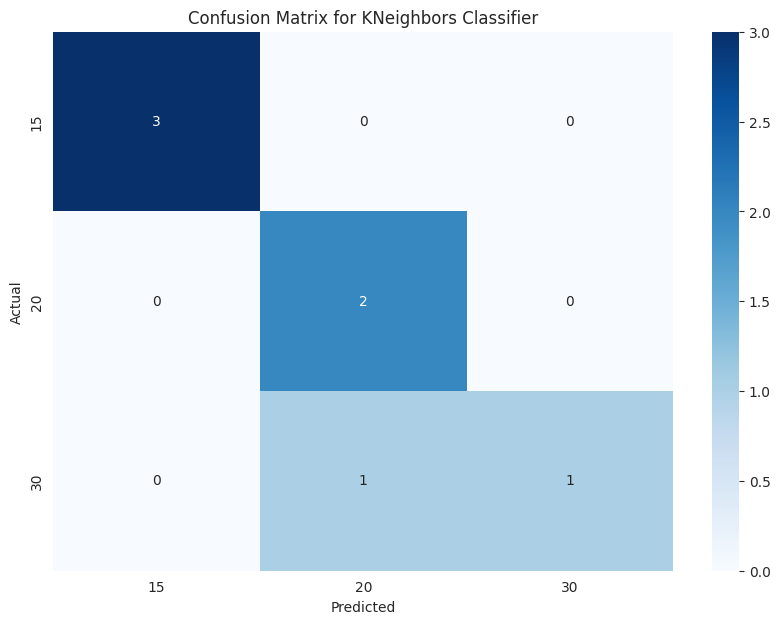

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          15       1.00      1.00      1.00         3
          20       0.67      1.00      0.80         2
          30       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.89      0.83      0.82         7
weighted avg       0.90      0.86      0.85         7



In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Select the top 5 features
selector = SelectKBest(score_func=f_classif, k=10)
# Fit the selector to the training data
selector.fit(train_scaled, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['DO_1', 'DO_2', 'DO_3', 'DO_4', 'BOD_2', 'TSS_2', 'color_1', 'color_2',
       'color_4', 'color_5'],
      dtype='object')


Regmi, R.K., & Mishra, B.K. (2016). Use of Water Quality Index in Water Quality Assessment: A Case Study in the Metro Manila.

Canadian Water Quality Guidelines for the Protection of Aquatic Life

In [35]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py
py.init_notebook_mode()

In [36]:
plt.style.use('fivethirtyeight')

In [37]:
ts_data = pd.read_excel('ccme_wqi.xlsx')
ts_data.head()

date        wqi
0 2022-01-01  34.881833
1 2022-02-01  34.838682
2 2022-03-01  34.467608
3 2022-04-01  38.003392
4 2022-05-01  38.507570

In [38]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33 non-null     datetime64[ns]
 1   wqi     33 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes


In [39]:
ts_data = ts_data.rename(columns={'date': 'ds', 'wqi': 'y'})
ts_data.head()

ds          y
0 2022-01-01  34.881833
1 2022-02-01  34.838682
2 2022-03-01  34.467608
3 2022-04-01  38.003392
4 2022-05-01  38.507570

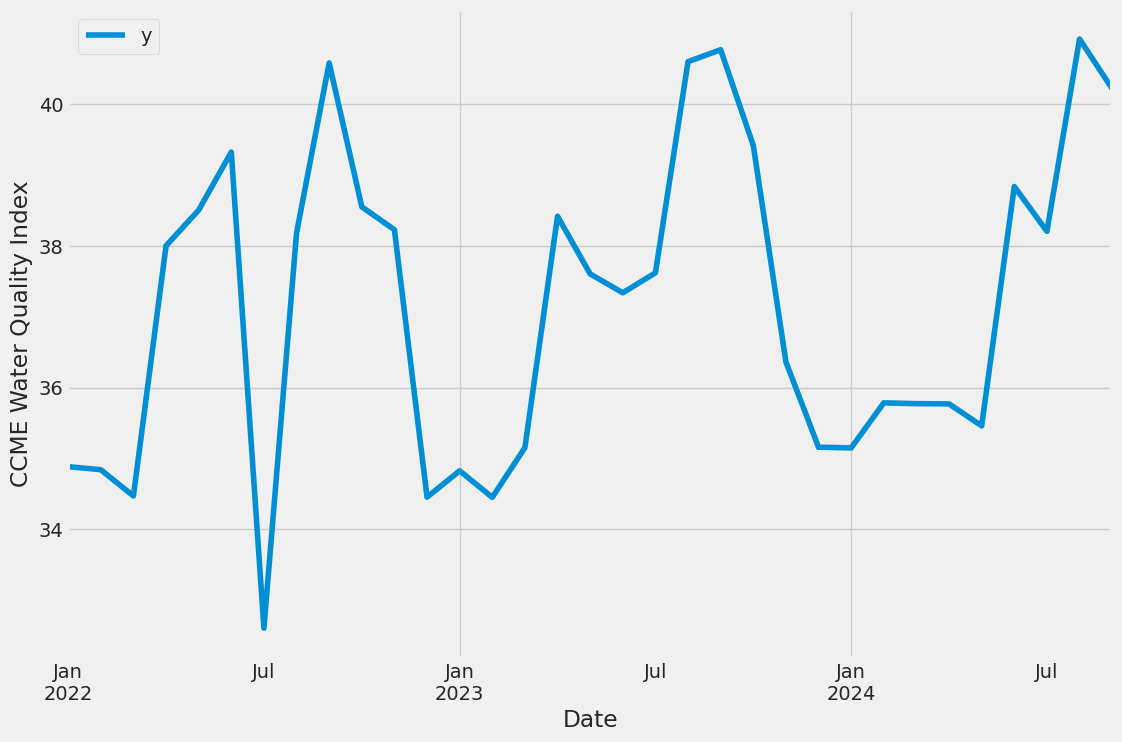

In [40]:
ax = ts_data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('CCME Water Quality Index')
ax.set_xlabel('Date')

plt.show()

In [41]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [42]:
my_model.fit(ts_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3abo6rkq/4r08ladp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3abo6rkq/_4hnq3s1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46257', 'data', 'file=/tmp/tmp3abo6rkq/4r08ladp.json', 'init=/tmp/tmp3abo6rkq/_4hnq3s1.json', 'output', 'file=/tmp/tmp3abo6rkq/prophet_modelz6z8kmzc/prophet_model-20241110072932.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
future_dates = my_model.make_future_dataframe(periods=3, freq='MS')
future_dates.head()

ds
0 2022-01-01
1 2022-02-01
2 2022-03-01
3 2022-04-01
4 2022-05-01

In [50]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2022-01-01  34.946111   33.272312   36.736567
1 2022-02-01  34.958710   33.470422   36.832113
2 2022-03-01  34.727707   32.932030   36.426552
3 2022-04-01  37.386641   35.567310   39.063406
4 2022-05-01  37.171814   35.544779   39.037079

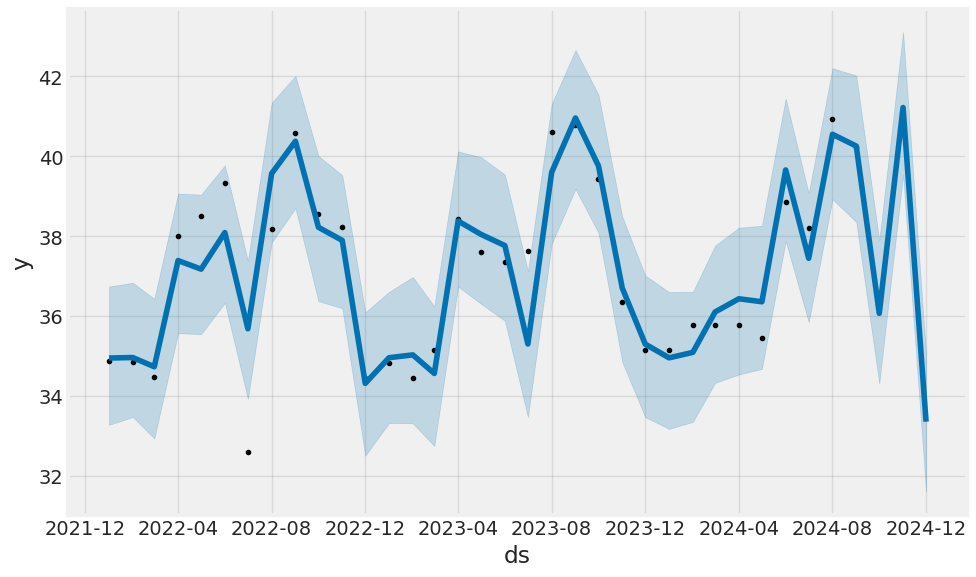

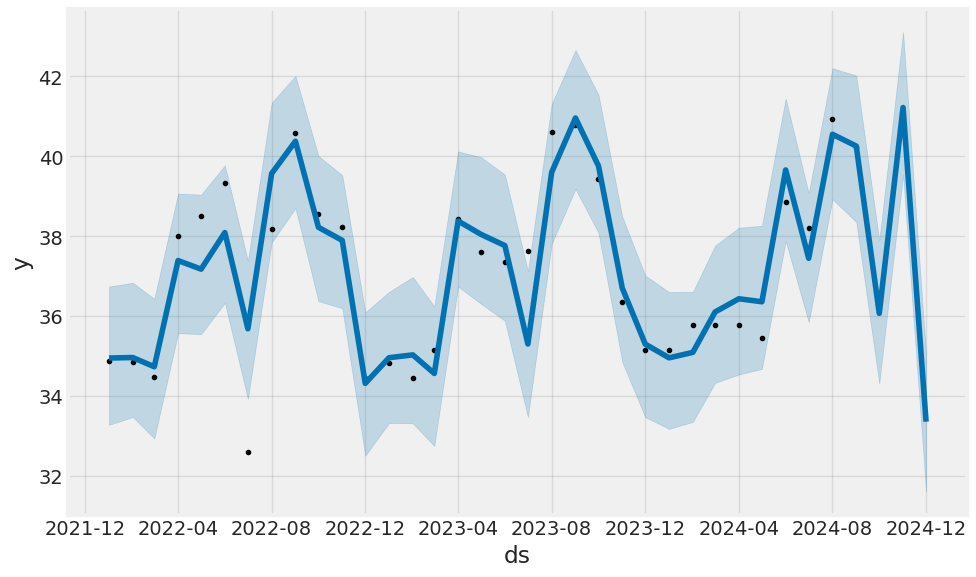

In [51]:
my_model.plot(forecast, uncertainty=True)

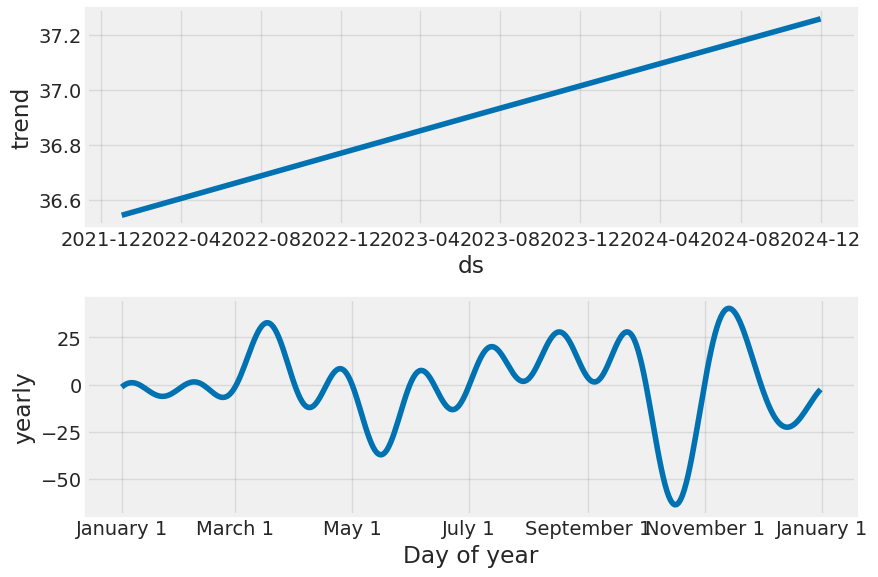

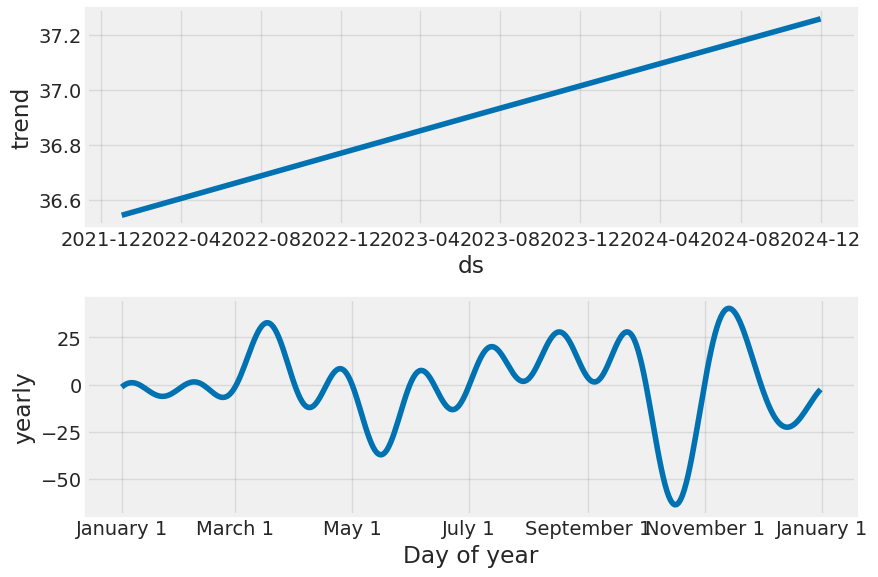

In [52]:
my_model.plot_components(forecast)

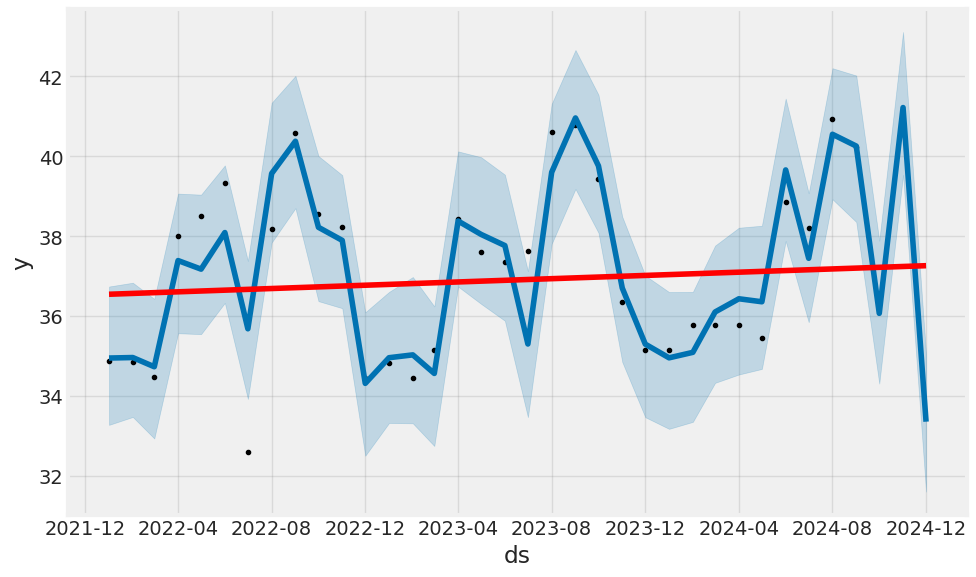

In [53]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)